# Project 2: Profiles of Profitable Apps

Objective: Analyze data from Google Play and Apples App Store to determine which types of free apps are most likely to attract a high volume of users. Make a recommendation for the best app categories to target with free apps utilizing an ad-based revenue model.

## Import Modules

In [1]:
from csv import reader
import matplotlib as mpl
import matplotlib.pyplot as plt

## Import Data

The data for this analysis was provided in csv files. Define a function to read the data from csv files. Create an option to preview the headers and view the first two rows of data. Determine the number of rows and columns in each dataset.

In [2]:
# Define a function to read data from csv files

def read_csv(file_name, preview=False):
    with open(file_name,'r') as opened_file:
        read_file = reader(opened_file)
        all_rows = list(read_file)
        header = all_rows[0]
        data = all_rows[1:]
        if preview:
            print("Headers:", header)
            print('\n')
            for row in data[:2]:
                print(row)
                print('\n')
            print('\n')
            print("Number of Rows: ", len(data))
            print('\n')
            print("Number of Columns: ", len(header))
        else:
            return all_rows

### Google Play Store

The dataset for the Google Play Store was obtained from [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps). 

The dataset contains 13 fields, a brief definition for each field is included below:


1. 'App' : Application Name
1. 'Category' : Application Category
1. 'Rating' : Overall User Rating 
1. 'Reviews' : Number of User Reviews
1. 'Size' : Size of the App
1. 'Installs' : Number of User Downloads
1. 'Type' : Paid or Free
1. 'Price' : Price in USD
1. 'Content Rating' : Target Age Group
1. 'Genres' : Apps can be Classified in Multiple Genres
1. 'Last Updated' : Date of Last Update
1. 'Current Version' : Name of Current Version
1. 'Android Version' : Minimum Android Version Required 




 


In [3]:
# Preview the data from Google Play Store
read_csv('googleplaystore.csv',preview=True)
# Assign the data to the variable android
android = read_csv('googleplaystore.csv')
print('\n')
# Examine the data type
print(f'Data Type: {type(android)}')

Headers: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']




Number of Rows:  10841


Number of Columns:  13


Data Type: <class 'list'>


### Apple App Store

The dataset for the Apple App Store was also obtained from [Kaggle](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps). 

The dataset contains 16 fields, a brief definition for each field is included below:

1. 'id' : App ID
1. 'track_name' : App Name
1. 'size_bytes' : Download Size in Bytes
1. 'currency' : Transaction Currency Used
1. 'price' : Purchase Price
1. 'rating_count_tot' : User Rating Counts (All Versions)
1. 'rating_count_ver' : User Rating Counts (Current Version)
1. 'user_rating' : Average User Rating (All Versions)
1. 'user_rating_ver' : Average User Rating (Current Version)
1. 'ver' : Latest Version Code
1. 'cont_rating' : Target Age Group
1. 'prime_genre' : Primary Genre
1. 'sup_devices.num' : Number of Devices Supported
1. 'ipadSc_urls.num' : Number of Screenshots Displayed
1. 'lang.num' : Number of Supported Languages
1. 'vpp_lic' : VPP Device based Licensing Enabled 


In [4]:
# Preview the data from the Apple App Store
read_csv('AppleStore.csv',preview=True)
# Assign the data to the variable apple
apple = read_csv('AppleStore.csv')
print('\n')
# Examine the data type
print(f'Data Type: {type(apple)}')

Headers: ['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']




Number of Rows:  7197


Number of Columns:  16


Data Type: <class 'list'>


# Cleaning the Data 

* Determine which fields(columns) will be useful for the analysis. 

* Transform the data into the format which is most suitable.

* Remove duplicate entries and invalid records. 

### Identifying Useful Data

In the previous section, we imported the data and reviewed the structure of each dataset. Now, lets identify which columns will be useful for our analysis.

As a reminder, we want to identify the types of free apps most likely to attract alot of users.

Since the two datasets are not identical, we should include comparable fields covered by both datasets.


The key attributes to examine for each app are as follows:

* App Name
* App Version
* Category / Genre
* Content Rating
* Number of Reviews
* Average Rating
* Number of Installs
* Price in USD
* Free or Paid


#### Google Play Store

In [5]:
# Use List Comprehension to extract the desired columns for android dataset
# Assign the new list to clean_android

clean_android = [[col[0],col[11],col[1],col[8],col[3],col[2],col[5],col[7],col[6]] for col in android]

# Print the header and first row of data to verify the results

for row in clean_android[:2]:
    print(row)
    print('\n')

['App', 'Current Ver', 'Category', 'Content Rating', 'Reviews', 'Rating', 'Installs', 'Price', 'Type']


['Photo Editor & Candy Camera & Grid & ScrapBook', '1.0.0', 'ART_AND_DESIGN', 'Everyone', '159', '4.1', '10,000+', '0', 'Free']




#### Apple App Store

In [6]:
# Use list comprehension to extract the desired columns for apple dataset
# Assign the new list to clean_apple

clean_apple = [[col[1],col[9],col[11],col[10],col[6],col[8],col[5],col[4]] for col in apple]

# Print the header and first row of data to verify the results

for row in clean_apple[:2]:
    print(row)
    print('\n')

['track_name', 'ver', 'prime_genre', 'cont_rating', 'rating_count_ver', 'user_rating_ver', 'rating_count_tot', 'price']


['Facebook', '95.0', 'Social Networking', '4+', '212', '3.5', '2974676', '0.0']




### Transforming the Data

* The Apple Store dataset does not contain a column to categorize apps as 'Paid' or 'Free', but we can use the price column to create this field.

In [7]:
# Slice the header from the clean_apple dataset
clean_apple_header = clean_apple[0]

# Append a 'Type' column to the header row
clean_apple_header.append('Type')
print(clean_apple_header)

['track_name', 'ver', 'prime_genre', 'cont_rating', 'rating_count_ver', 'user_rating_ver', 'rating_count_tot', 'price', 'Type']


In [8]:
# Slice the data from the clean_apple dataset
clean_apple_data = clean_apple[1:]
print(clean_apple_data[:3])

[['Facebook', '95.0', 'Social Networking', '4+', '212', '3.5', '2974676', '0.0'], ['Instagram', '10.23', 'Photo & Video', '12+', '1289', '4.0', '2161558', '0.0'], ['Clash of Clans', '9.24.12', 'Games', '9+', '579', '4.5', '2130805', '0.0']]


In [9]:
# Loop over clean_apple_data
# If the value of price is > 0, then append 'paid' to a new column
# Otherwise append 'free' to a new column

for row in clean_apple_data:
    p = row[-1]
    if float(p)>0:
        row.append('paid')
    else:
        row.append('free') 

In [10]:
print(clean_apple_header)

['track_name', 'ver', 'prime_genre', 'cont_rating', 'rating_count_ver', 'user_rating_ver', 'rating_count_tot', 'price', 'Type']


### Removing Paid Apps 

For this analysis, we must identify the categories where free apps are likely to attract a large number of users. Since we are only interested in free apps, we should remove the paid apps from our dataset. Before we remove the paid apps, lets create a frequency table to evaluate the mix of 'free' vs. 'paid' apps.

#### Google Play Store

In [11]:
# Isolate the data and header rows in android dataset
android_header = clean_android[:1]
print(android_header)
clean_android_data = clean_android[1:]

[['App', 'Current Ver', 'Category', 'Content Rating', 'Reviews', 'Rating', 'Installs', 'Price', 'Type']]


In [19]:
# Create a frequency table to compare paid vs. free apps in apple dataset

android_freq_table = {}

for row in clean_android_data:
    type = row[-1]
    if type in android_freq_table:
        android_freq_table[type] += 1
    else:
        android_freq_table[type] = 1

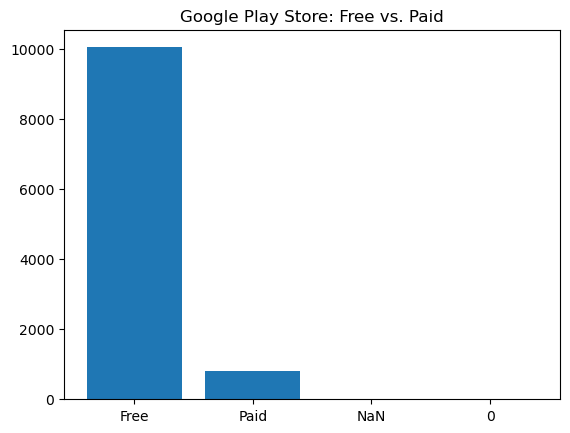

{'Free': 10039, 'Paid': 800, 'NaN': 1, '0': 1}


In [13]:
plt.bar(android_freq_table.keys(),android_freq_table.values())
plt.title("Google Play Store: Free vs. Paid")
plt.show()
print(android_freq_table)

In [14]:
# Examine 'NaN' and '0' Value Rows, Exclude these rows due to errors

not_a_num = [row for row in clean_android_data if row[-1]=='NaN']
zero = [row for row in clean_android_data if row[-1]=='0']
print(android_header)
print('\n')
print(not_a_num)
print('\n')
print(zero)

[['App', 'Current Ver', 'Category', 'Content Rating', 'Reviews', 'Rating', 'Installs', 'Price', 'Type']]


[['Command & Conquer: Rivals', 'Varies with device', 'FAMILY', 'Everyone 10+', '0', 'NaN', '0', '0', 'NaN']]


[['Life Made WI-Fi Touchscreen Photo Frame', '4.0 and up', '1.9', '', '3.0M', '19', 'Free', 'Everyone', '0']]


In [21]:
# Use list comprehension to isolate the free apps 

android_free_apps = [row for row in clean_android_data if row[-1]=='Free']

#### Apple App Store

In [16]:
# Create a frequency table to compare paid vs. free apps in apple dataset

apple_freq_table = {}

for row in clean_apple_data:
    type = row[-1]
    if type in apple_freq_table:
        apple_freq_table[type] += 1
    else:
        apple_freq_table[type] = 1

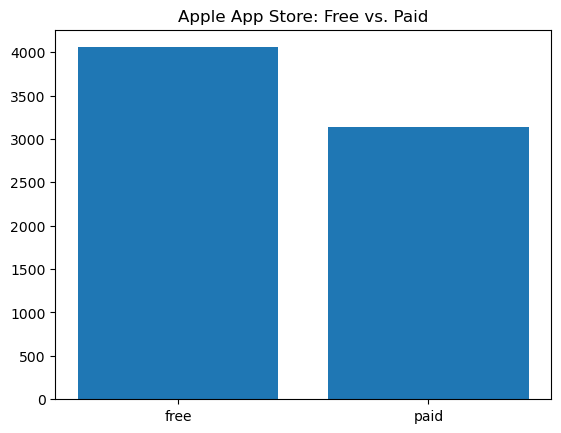

{'free': 4056, 'paid': 3141}


In [17]:
# Generate a frequency table

plt.bar(apple_freq_table.keys(),apple_freq_table.values())
plt.title("Apple App Store: Free vs. Paid")
plt.show()
print(apple_freq_table)

In [18]:
# Use list comprehension to isolate the free apps 

apple_free_apps = [row for row in clean_apple_data if row[-1]=='free']